In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression




In [2]:
df=pd.read_csv('spotify_millsongdata.csv')

In [3]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [4]:
df.shape

(57650, 4)

In [5]:
df=df.sample(20000).drop('link', axis=1).reset_index(drop=True)


In [6]:
pp=df.copy()

In [7]:
pp['text'] = pp['text'].apply(lambda x: str(x).lower().replace(r'^\w\s',' ').replace(r'\n',' ',))

In [8]:
df['text']= df['text'].apply(lambda x :str(x).replace(r'\n\r',' '))

NOW that we have assigned the link to another column we can drop them


In [9]:
df.shape

(20000, 3)

In [10]:
artist_list=df.groupby('artist').count()

Now we are having 643 artist list in our dataset


In [11]:
artist_list.count()

song    636
text    636
dtype: int64

In [12]:
df['song']=df['song'].str.lower()

In [13]:
df['text'].str.count('\n').sum()

823493

In [14]:
df.columns

Index(['artist', 'song', 'text'], dtype='object')

In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer


In [16]:

# import nltk
# it is a nlp library , it is used to process the text data
# from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
# stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KUSHAL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In this the similar words which are having same meaning but differ in spelling are changed into one common word


In [17]:
def preprocess_text(text):
    tokens = word_tokenize(text)  # Tokenization and lowercase conversion
    tokens = [token for token in tokens if token not in stop_words and token not in punctuation]  # Stopword and punctuation removal
    
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)
     

In [18]:
# # import nltk
# # nltk.download('punkt')
# token(df['text'][0])
# token('hello world beautiful beauty')

In [19]:
df['cleaned text']=df['text'].apply(preprocess_text)


In [20]:
tdidf=TfidfVectorizer(analyzer='word', stop_words='english')
metrixs=tdidf.fit_transform(df['cleaned text'])

Here we are taking sample data for testing 


In [21]:
# from sklearn.metrics.pairwise import cosine_similarity
# from scipy.sparse import csr_matrix

# # Assuming 'matrix' is a sparse matrix in CSR format
# sparse_matrix = csr_matrix(matrix)

# # Compute cosine similarity using sparse matrices
similar = cosine_similarity(metrixs)

In [22]:
similar[0]

array([1.        , 0.07127863, 0.01590097, ..., 0.01778692, 0.17430599,
       0.01274211])

In [23]:
df['song']

0                         crawl away
1                      you can't run
2                  red death at 6:14
3                            haunted
4                            sweeter
                    ...             
19995                  dont say okay
19996                    belle starr
19997          ride across the river
19998    when you say nothing at all
19999          it don't matter to me
Name: song, Length: 20000, dtype: object

In [24]:
# df[df['song']=="city's burning"].index[0]

Now we are making recommder function for getting the songs


In [25]:
def recommder(song_name):
    idx=df[df['song']==song_name].index[0]
    distance=sorted(list(enumerate(similar[idx])), key=lambda x: x[1], reverse=True)
    song=[]
    for s_id in distance[1:20]:
        song.append(df.iloc[s_id[0]].song)
    return song
    
    

In [26]:
# recommder("steel drivin' man")

In [27]:
print(pp.iloc[0].text)

you crawled away from me.  
slipped away from me.  
i tried to keep a hold,  
but there was nothing i could say.  
you slid and crept away  
and there was nothing i could say.  
so what you're trying to say  
is you don't wanna play.  
but what you want and what you need  
doesn't mean fuck to me.  
because i can see your back is turning.  
if i could i'd stick the knife in.  
this is love.  
this is my love for you.  
get up.  
now.  
say you won't go.




Now we are gonna do the dumping of our code to bytes through pickle with dump method

In [28]:
def artist_songs(song_name):
    index_range=pp[pp['song']==song_name].artist
    artist_list=pp[pp['artist']==index_range.iloc[0]].song
    return artist_list

In [29]:

from sklearn.datasets import make_blobs
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

now we are going to take the sample data

In [30]:
# Randomly sample a subset of song descriptions for clustering (adjust sample size as needed)
sample_size = 1000
random_indices = np.random.choice(len(df['cleaned text']), size=sample_size, replace=False)
sampled_descriptions = [df.iloc[i] for i in random_indices]

In [31]:
sampled_descriptions=pd.DataFrame(sampled_descriptions)

we need to change it to data frame

now that we got the sampled data , we gonna do tfidf on that sampled data


In [32]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity
tdif=TfidfVectorizer(analyzer='word', stop_words='english', max_features=100)

In [33]:
matrix=tdif.fit_transform(sampled_descriptions['cleaned text'])

In [34]:
print(matrix.shape)

(1000, 100)


In [35]:
wcss = []
silhouette_scores = []

# Try different values of k (number of clusters) and compute WCSS and silhouette scores
for k in range(2, 10):
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=0)
    kmeans.fit(matrix)
    wcss.append(kmeans.inertia_)  # Within-cluster sum of squares
    silhouette_scores.append(silhouette_score(matrix, kmeans.labels_))
    

C:\Users\KUSHAL\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\KUSHAL\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\KUSHAL\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)
C:\Users\KUSHAL\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The defaul

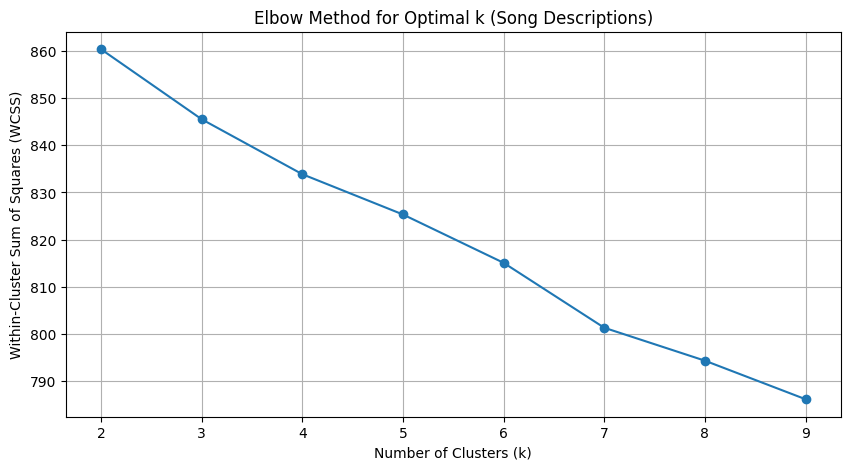

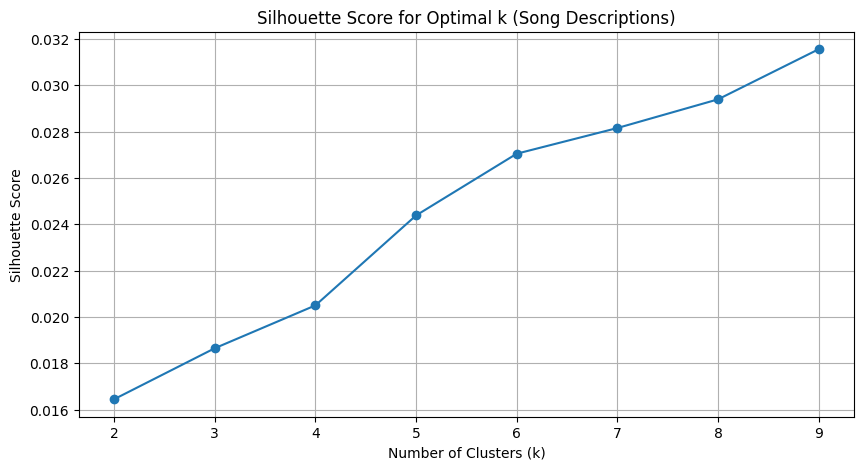

In [36]:
# Plotting Elbow Method (WCSS vs. Number of Clusters)
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k (Song Descriptions)')
plt.xticks(np.arange(2, 10))
plt.grid(True)
plt.show()

# Plotting Silhouette Score vs. Number of Clusters
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k (Song Descriptions)')
plt.xticks(np.arange(2, 10))
plt.grid(True)
plt.show()

In [37]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

C:\Users\KUSHAL\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


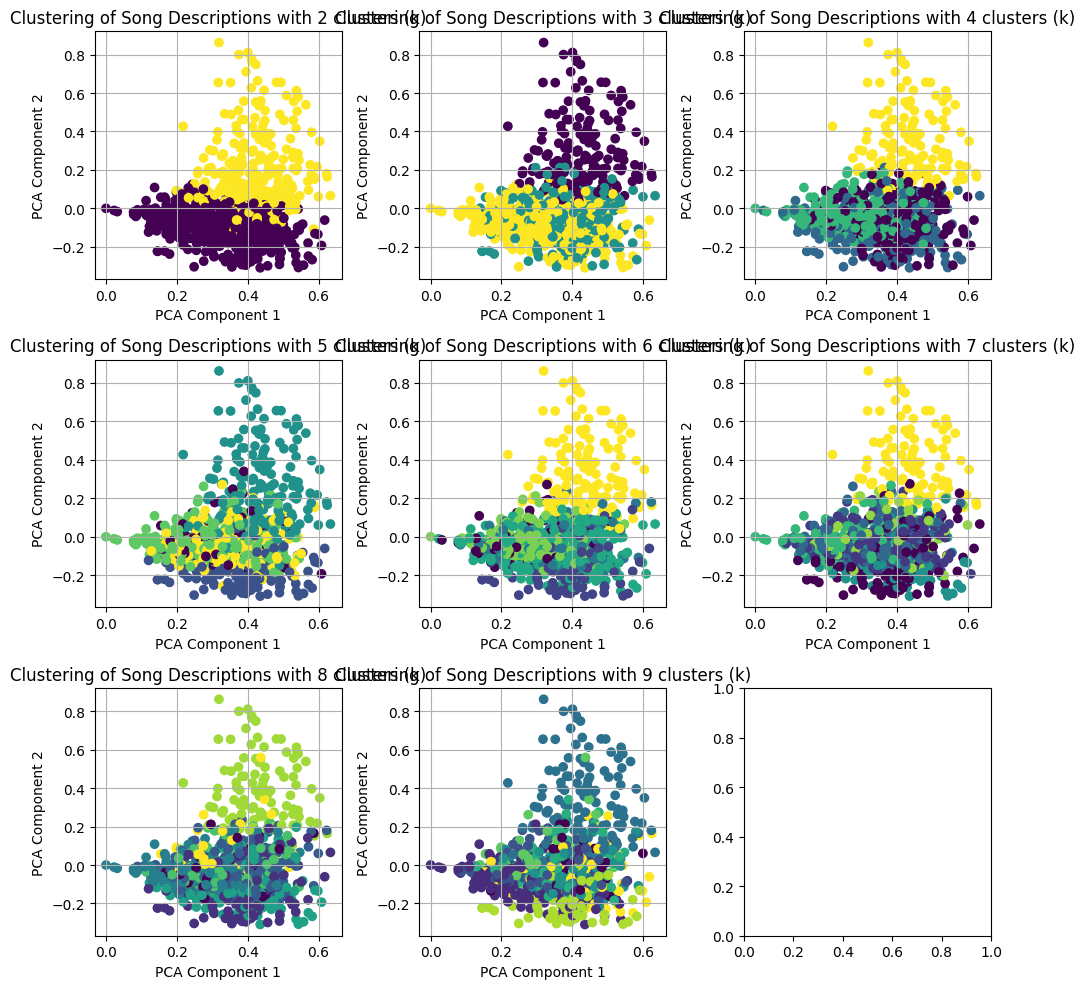

In [38]:
# Perform dimensionality reduction for visualization using PCA
svd = TruncatedSVD(n_components=2, random_state=0)
tfidf_svd = svd.fit_transform(matrix)
#we usedsvdfor dimensionality reduction, which is a matrix factorization technique that is used to reduce the dimensionality of the data while preserving the most important information.    
fig,axs=plt.subplots(3,3)
fig.set_size_inches(10, 10)
scatter_plots=[]
# Initialize MiniBatchKMeans clustering with optimal k (e.g., based on elbow method or silhouette score)
for i in range(2,10):
    k = i  # Example: Optimal number of clusters
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=0)
    kmeans.fit(matrix)

    # Get cluster labels and plot clusters in a scatter plot
    cluster_labels = kmeans.labels_
    scatter_plot = axs[int((i-2)/3),(i-2)%3].scatter(tfidf_svd[:, 0], tfidf_svd[:, 1], c=cluster_labels, cmap='viridis')
    # plt.scatter(tfidf_svd[:, 0], tfidf_svd[:, 1], c=cluster_labels, cmap='viridis')
   
    axs[int((i - 2) / 3), (i - 2) % 3].set_xlabel('PCA Component 1')
    axs[int((i - 2) / 3), (i - 2) % 3].set_ylabel('PCA Component 2')
    axs[int((i - 2) / 3), (i - 2) % 3].set_title(f'Clustering of Song Descriptions with {i} clusters (k)')
    axs[int((i - 2) / 3), (i - 2) % 3].grid(True)

    scatter_plots.append(scatter_plot)  # Add scatter plot object to the list
   
# plt.colorbar(scatter_plots[-2], ax=axs,location='left',pad=0.05, label='Cluster')
plt.tight_layout()
plt.show()

In [39]:
kmeans = KMeans(n_clusters=9, init='k-means++', random_state=42)
kmeans.fit(matrix)

# Add cluster labels to dataset
sampled_descriptions['cluster'] = kmeans.labels_+2


C:\Users\KUSHAL\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [94]:
p=sampled_descriptions.copy()

In [41]:
kmeans.cluster_centers_.shape

(9, 100)

In [42]:
import pickle

In [43]:
# pickle.dump(similar, open('similar.pkl', 'wb'))

In [44]:
# pickle.dump(df, open('df.pkl', 'wb'))

In [59]:
# Dictionary for genre values (with values converted to strings)
genre_values = {
    'Classical': ['Orchestral, Symphonic, Compositional complexity, Instrumental mastery, Elegance, '
                 'Formal structure, Timelessness, Emotionally evocative, Virtuosity'],
    'Heavy Metal': ['Aggression, Distortion, Amplification, Dark themes, Intensity, Rebellion, '
                   'Complex guitar riffs, Screaming vocals, Power'],
    'Punk': ['Anarchy, Rebellion, DIY ethos, Raw energy, Fast tempo, Anti-establishment, '
            'Political dissent, Social commentary, Minimalism'],
    'Reggaeton': ['Rhythm, Danceability, Spanish lyrics, Latin beats, Urban culture, Sensuality, '
                 'Party atmosphere, Caribbean influence, Fusion of genres'],
    'Indie': ['Alternative, DIY spirit, Non-conformity, Quirkiness, Artistic expression, Subculture, '
             'Introspection, Authenticity, Underground'],
    'Gospel': ['Faith, Spirituality, Worship, Soulful vocals, Joy, Testimony, Redemption, Church, '
              'Hope'],
    'Metalcore': ['Aggression, Breakdowns, Screamed vocals, Melodic elements, Technical proficiency, '
                 'Emotional intensity, Dual vocal styles, Heavy guitar riffing, Catharsis'],
    'Ska': ['Upbeat tempo, Offbeat rhythm, Horn sections, Jamaican influence, Danceable grooves, Fun, '
           'Lightheartedness, Subcultural identity, Skanking'],
    'Funk': ['Groove, Rhythmic syncopation, Soulful vocals, Danceability, Improvisation, '
            'Tight instrumentation, Syncopated basslines, Horn sections, Party atmosphere'],
    'Disco': ['Dancefloor, Glittering, Funky basslines, Four-on-the-floor beat, Studio production, '
             'High energy, Glamour, Nightlife, Liberation']
}


# Dictionary for genre labels
genre_labels = {
    'Classical': 0,
    'Heavy Metal': 1,
    'Punk': 2,
    'Reggaeton': 3,
    'Indie': 4,
    'Gospel': 5,
    'Metalcore': 6,
    'Ska': 7,
    'Funk': 8,
    'Disco': 9
}
genre_thems = {
    'Classical': 'Orchestral, Symphonic, Compositional complexity, Instrumental mastery, Elegance, '
                 'Formal structure, Timelessness, Emotionally evocative, Virtuosity',
    'Heavy Metal': 'Aggression, Distortion, Amplification, Dark themes, Intensity, Rebellion, '
                   'Complex guitar riffs, Screaming vocals, Power',
    'Punk': 'Anarchy, Rebellion, DIY ethos, Raw energy, Fast tempo, Anti-establishment, '
            'Political dissent, Social commentary, Minimalism',
    'Reggaeton': 'Rhythm, Danceability, Spanish lyrics, Latin beats, Urban culture, Sensuality, '
                 'Party atmosphere, Caribbean influence, Fusion of genres',
    'Indie': 'Alternative, DIY spirit, Non-conformity, Quirkiness, Artistic expression, Subculture, '
             'Introspection, Authenticity, Underground',
    'Gospel': 'Faith, Spirituality, Worship, Soulful vocals, Joy, Testimony, Redemption, Church, '
              'Hope',
    'Metalcore': 'Aggression, Breakdowns, Screamed vocals, Melodic elements, Technical proficiency, '
                 'Emotional intensity, Dual vocal styles, Heavy guitar riffing, Catharsis',
    'Ska': 'Upbeat tempo, Offbeat rhythm, Horn sections, Jamaican influence, Danceable grooves, Fun, '
           'Lightheartedness, Subcultural identity, Skanking',
    'Funk': 'Groove, Rhythmic syncopation, Soulful vocals, Danceability, Improvisation, '
            'Tight instrumentation, Syncopated basslines, Horn sections, Party atmosphere',
    'Disco': 'Dancefloor, Glittering, Funky basslines, Four-on-the-floor beat, Studio production, '
             'High energy, Glamour, Nightlife, Liberation'
}



In [57]:
genre_values

{'Classical': ['Orchestral, Symphonic, Compositional complexity, Instrumental mastery, Elegance, Formal structure, Timelessness, Emotionally evocative, Virtuosity'],
 'Heavy Metal': ['Aggression, Distortion, Amplification, Dark themes, Intensity, Rebellion, Complex guitar riffs, Screaming vocals, Power'],
 'Punk': ['Anarchy, Rebellion, DIY ethos, Raw energy, Fast tempo, Anti-establishment, Political dissent, Social commentary, Minimalism'],
 'Reggaeton': ['Rhythm, Danceability, Spanish lyrics, Latin beats, Urban culture, Sensuality, Party atmosphere, Caribbean influence, Fusion of genres'],
 'Indie': ['Alternative, DIY spirit, Non-conformity, Quirkiness, Artistic expression, Subculture, Introspection, Authenticity, Underground'],
 'Gospel': ['Faith, Spirituality, Worship, Soulful vocals, Joy, Testimony, Redemption, Church, Hope'],
 'Metalcore': ['Aggression, Breakdowns, Screamed vocals, Melodic elements, Technical proficiency, Emotional intensity, Dual vocal styles, Heavy guitar riffin

In [88]:
# Create a list to hold genre-description pairs
genre_description_list = []

# Iterate over the genre_values dictionary and append genre-description pairs to the list
for genre, description_list in genre_values.items():
    for description in description_list:
        genre_description_list.append({'Genre': genre, 'Description': description})

# Convert the list of dictionaries into a DataFrame
genre_data = pd.DataFrame(genre_description_list)

# Display the DataFrame
genre_data

,Genre,Description
0,Classical,"Orchestral, Symphonic, Compositional complexit..."
1,Heavy Metal,"Aggression, Distortion, Amplification, Dark th..."
2,Punk,"Anarchy, Rebellion, DIY ethos, Raw energy, Fas..."
3,Reggaeton,"Rhythm, Danceability, Spanish lyrics, Latin be..."
4,Indie,"Alternative, DIY spirit, Non-conformity, Quirk..."
5,Gospel,"Faith, Spirituality, Worship, Soulful vocals, ..."
6,Metalcore,"Aggression, Breakdowns, Screamed vocals, Melod..."
7,Ska,"Upbeat tempo, Offbeat rhythm, Horn sections, J..."
8,Funk,"Groove, Rhythmic syncopation, Soulful vocals, ..."
9,Disco,"Dancefloor, Glittering, Funky basslines, Four-..."


In [47]:
del genre

In [60]:
genre_tfidf_matrix =tdif.fit_transform(genre_thems.values())
cluster_descriptions = tdif.transform(sampled_descriptions['cleaned text'])  # TF-IDF matrix for cluster descriptions
cluster_centroids = kmeans.cluster_centers_  # Centroids of clusters
print(cluster_centroids.shape,genre_tfidf_matrix.shape)

(9, 100) (10, 100)


In [61]:
similarities = cosine_similarity(cluster_centroids, genre_tfidf_matrix)
similarities

array([[0.12637529, 0.17911873, 0.33643454, 0.23009703, 0.12864422,
        0.10226196, 0.19682466, 0.19486753, 0.14918018, 0.17985647],
       [0.19650277, 0.37379513, 0.18392546, 0.29835403, 0.20489825,
        0.13378599, 0.36051071, 0.29972564, 0.21133895, 0.24324794],
       [0.13662503, 0.15368692, 0.1080726 , 0.20964859, 0.13846862,
        0.40520655, 0.16980428, 0.17459246, 0.126823  , 0.13807226],
       [0.2008849 , 0.22345634, 0.17402506, 0.4221272 , 0.26930971,
        0.10141284, 0.28813559, 0.21968713, 0.1463145 , 0.20156721],
       [0.13007677, 0.16780895, 0.17525238, 0.16268565, 0.1876261 ,
        0.04299417, 0.37877897, 0.17107994, 0.10485971, 0.15101274],
       [0.23602442, 0.275613  , 0.22935817, 0.33842037, 0.366644  ,
        0.20981316, 0.34954838, 0.33509069, 0.28138651, 0.27034443],
       [0.13087728, 0.15953404, 0.10103724, 0.1917156 , 0.15595677,
        0.08645893, 0.19044409, 0.11711019, 0.11432853, 0.43541486],
       [0.11226507, 0.39170862, 0.1466369

In [89]:
cluster_genre_labels = {}
for i, cluster_similarities in enumerate(similarities):
    most_similar_genre_index = cluster_similarities.argmax()
    cluster_genre_labels[i] = genre_data.loc[most_similar_genre_index, 'Genre']

# Add genre labels to dataset
# data['genre'] = [cluster_genre_labels[cluster] for cluster in kmeans.labels_]

In [70]:
cluster_genre_labels

{0: 'Punk',
 1: 'Heavy Metal',
 2: 'Gospel',
 3: 'Reggaeton',
 4: 'Metalcore',
 5: 'Indie',
 6: 'Disco',
 7: 'Heavy Metal',
 8: 'Funk'}

In [99]:
sampled_descriptions['cluster']=[cluster_genre_labels[cluster] for cluster in kmeans.labels_]

In [101]:
sampled_descriptions['cluster'].value_counts()


cluster
Heavy Metal    271
Indie          252
Reggaeton      117
Disco          108
Punk            75
Funk            67
Gospel          57
Metalcore       53
Name: count, dtype: int64